In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim
# CODE FILES HERE
from main import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# supress cluttering warnings in solutions
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# setting device on GPU if available, else CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cpu



In [29]:
mnist_dim = 784
hidden_units = 400 # Kingma, Welling use 500 neurons, otherwise use 400
z_dim = 20 # 1000 is suggested in the paper "Tutorial on VAE" but Kingma, Welling show 20 is sufficient for MNIST
# 2 layer networks for encoder and decoder
learning_rate = 1e-3
optimizer = torch.optim.Adam
epochs = 10 #10000
solver = Solver(optimizer, mnist_dim, hidden_units, z_dim, epochs, learning_rate)
xaxis = np.arange(1, epochs+1)

In [30]:
solver.run()

====> Epoch: 1 train set loss avg: 163.8790
====> Test set loss avg: 149.2073
62.8379065990448 seconds for epoch 1


KeyboardInterrupt: 

20


ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

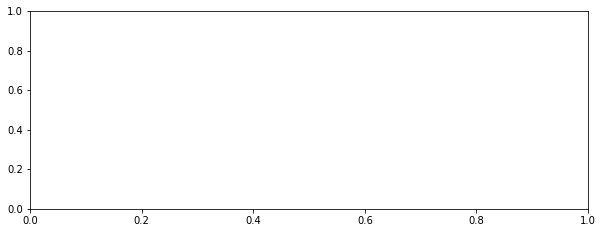

In [20]:
plt.subplot(2, 1, 1)
plt.plot(xaxis, solver.train_loss_history, '-o')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train loss'], loc='upper right')
plt.xticks(xaxis)

plt.subplot(2, 1, 2)
plt.plot(xaxis, solver.test_loss_history, '-o')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['test loss'], loc='upper right')
plt.xticks(xaxis)

plt.show()